Exercise 1
1. Use the train.tsv dataset at https://www.kaggle.com/c/sentiment-analysis-onmovie-reviews/data
2. Take a look at the data and get info about the data
3. Count the number of expressed sentiments by category
4. Provide a histogram of sentiments by category
5. Generate document term matrix by using scikit-learn's CountVectorizer. Tokenize
and remove symbols and numbers
6. Split dataset (the test dataset represents 30% of the total data).
7. Import the MultinomialNB module and create a Multinomial Naive Bayes
classifier object using MultinomialNB() function. Compute the model accuracy.
8. TF-IDF(Term Frequency-Inverse Document Frequency) normalizes the
document term matrix. It is the product of TF and IDF. Word with high tf-idf in a
document, it is most of the times occurred in given documents and must be
absent in the other documents. So, the words must be a signature word. Use
TfidfVectorizer() for 'Phrase'.
9. Split dataset by using function train_test_split(). You need to pass basically 3
parameters features, target, and test_set size. Additionally, you can use
random_state to select records randomly.
10.Build the Text Classification Model using TF-IDF.
11.First, import the MultinomialNB module and create the Multinomial Naive Bayes
classifier object using MultinomialNB() function.
12.Then, fit your model on a train set using fit() and perform prediction on the test
set using predict().

In [27]:
import pandas as pd
df = pd.read_csv("/content/train.tsv", sep='\t')
df.head()


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [28]:
df.tail()

,PhraseId,SentenceId,Phrase,Sentiment
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2
156059,156060,8544,chortles,2


In [29]:
df.info

<bound method DataFrame.info of         PhraseId  SentenceId  \
0              1           1   
1              2           1   
2              3           1   
3              4           1   
4              5           1   
...          ...         ...   
156055    156056        8544   
156056    156057        8544   
156057    156058        8544   
156058    156059        8544   
156059    156060        8544   

                                                   Phrase  Sentiment  
0       A series of escapades demonstrating the adage ...          1  
1       A series of escapades demonstrating the adage ...          2  
2                                                A series          2  
3                                                       A          2  
4                                                  series          2  
...                                                   ...        ...  
156055                                          Hearst 's          2  
156056         

In [30]:
#Take a look at the data and get info about the data
df.describe()

,PhraseId,SentenceId,Sentiment
count,156060.000000,156060.000000,156060.000000
mean,78030.500000,4079.732744,2.063578
std,45050.785842,2502.764394,0.893832
min,1.000000,1.000000,0.000000
25%,39015.750000,1861.750000,2.000000
50%,78030.500000,4017.000000,2.000000
75%,117045.250000,6244.000000,3.000000
max,156060.000000,8544.000000,4.000000


In [31]:
df.shape


(156060, 4)

In [32]:
#Count the number of expressed sentiments by category
print(df['Sentiment'].value_counts())


2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64


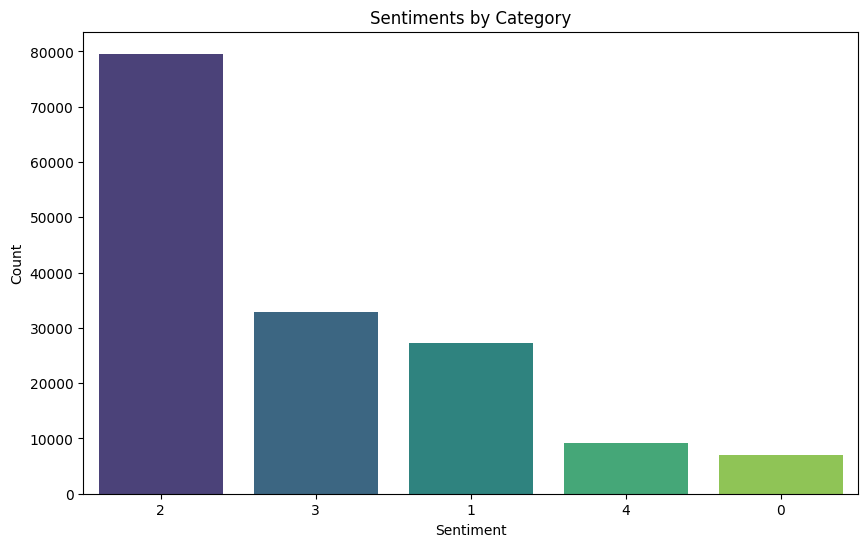

In [33]:
#Provide a histogram of sentiments by category
import matplotlib.pyplot as plt
import seaborn as sns
counts=df['Sentiment'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sentiment', order=counts.index, palette='viridis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiments by Category')
plt.show()

In [34]:

#Generate document term matrix by using scikit-learn's CountVectorizer. Tokenize and remove symbols and numbers
from sklearn.feature_extraction.text import CountVectorizer
import re
from sklearn.model_selection import train_test_split

text_data = df['Phrase'].astype(str)

count_vectorizer = CountVectorizer(tokenizer=lambda i: re.findall(r'\b\w+\b', i))
mat_documentTerm = count_vectorizer.fit_transform(text_data)

# Obtaining the feature names and use them as column names for matrix dataframe
column_names = count_vectorizer.get_feature_names_out()
documentTerm_df = pd.DataFrame(mat_documentTerm.toarray(), columns=column_names)

documentTerm_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,000,1,10,100,101,102,103,104,105,10th,...,ziyi,zoe,zombie,zone,zoning,zoolander,zoom,zucker,zwick,zzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
documentTerm_df.columns

Index(['000', '1', '10', '100', '101', '102', '103', '104', '105', '10th',
       ...
       'ziyi', 'zoe', 'zombie', 'zone', 'zoning', 'zoolander', 'zoom',
       'zucker', 'zwick', 'zzzzzzzzz'],
      dtype='object', length=15275)

In [36]:
documentTerm_df.columns.value_counts()

000           1
powerful      1
potshots      1
potter        1
potty         1
             ..
fiendishly    1
fiennes       1
fierce        1
fiercely      1
zzzzzzzzz     1
Length: 15275, dtype: int64

Questions 6-12 solved below

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

X = text_data
y = df['Sentiment']

# 70% train and 30% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Converting text data to numerical features using count vectorizer
vectorizer = CountVectorizer()
Xtrain_count = vectorizer.fit_transform(X_train)
Xtest_count = vectorizer.transform(X_test)

# Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(Xtrain_count, y_train)

# Model Prediction
y_pred = nb_classifier.predict(Xtest_count)
accuracy = accuracy_score(y_test, y_pred)
print("Multinomial Naive Bayes classifier Model Accuracy:", accuracy)


Multinomial Naive Bayes classifier Model Accuracy: 0.6100645051048742


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf= TfidfVectorizer()
Xtrain_tfidf = tfidf.fit_transform(X_train)
Xtest_tfidf = tfidf.transform(X_test)

# Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(Xtrain_tfidf, y_train)

# Model Prediction
y_pred = nb_classifier.predict(Xtest_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Multinomial Naive Bayes classifier Model Accuracy using Tfidf:", accuracy)

Multinomial Naive Bayes classifier Model Accuracy using Tfidf: 0.581763424323978


**Exercise 2**
1. Create an account with AWS.
2. Navigate to Amazon Comprehend. Check the documentation under the ‘DATA
690 Resources’.
3. Use the ‘Digital_Press_Sentiment.txt’ file to measure sentiment.
4. What are the entities and key phrases?


**Exercise 3**
1. Create an account with IBM Cloud
2. Use IBM Watson Natural Language Understanding/Text Analysis to run the same
sentiment analysis as in Exercise 2.
3. Is there any difference in the results? What is IBM’s philosophy in sentiment
analysis

**TEXT:**

The United Kingdom suffered one of the worst recessions among major economies last year. Germany, for example, held up better in the pandemic than it did during the global financial crisis. Provisional estimates suggest Europe's biggest economy contracted by 5% last year. EU GDP, meanwhile, is expected to have shrunk 6.4%, according to Eurostat.
The United States fared even better by comparison, with GDP decreasing by 3.5% from the prior year.
"Today's figures show that the economy has experienced a serious shock as a result of the pandemic, which has been felt by countries around the world," UK finance minister Rishi Sunak said in a statement. "While there are some positive signs of the economy's resilience over the winter, we know that the current lockdown continues to have a significant impact on many people and businesses."
The new national lockdown in the United Kingdom, imposed on January 5, is expected to hit the economy hard in the first quarter of 2021, reversing the return to growth in the fourth quarter of 2020.
"It seems that a double dip [recession] was merely delayed rather than avoided outright," Sam Miley, an economist at the London-based Centre for Economics and Business Research said in a note on Friday.
Disruption to EU-UK trade following the end of the Brexit transition period on December 31 is also weighing on activity.

**AWS Cloud**

**Entites:**


United Kingdom, one, worst, last year, Germany, pandemic, global, financial crisis, Europe, 5%, last year, EU, 6.4%, Eurostat, United States, 3.5%, prior year, Today, UK, finance minister, Rishi Sunak, United Kingdom, January 5, first quarter of 2021, fourth quarter of 2020, double dip, Sam Miley, London, Centre for Economics and Business Research, Friday, EU, UK, Brexit, December 31

**Key Phrases:**


The United Kingdom,
the worst recessions,
major economies,
last year,
Germany,
the pandemic,
the global financial crisis,
Provisional estimates,
Europe,
biggest economy,
5%,
last year,
EU GDP,
6.4%,
Eurostat,
The United States,
comparison,
GDP,
3.5%,
the prior year,
Today,
figures,
the economy,
a serious shock,
a result,
the pandemic,
countries,
the world,
UK finance minister Rishi Sunak,
a statement,
some positive signs,
the economy,
resilience,
the winter,
the current lockdown,
a significant impact,
many people and businesses,
The new national lockdown,
the United Kingdom,
January 5,
the economy,
the first quarter,
2021,
the return,
growth,
the fourth quarter,
2020,
a double dip [recession],
Sam Miley,
an economist


**IBM Cloud**

**Entities:**
5%, EU GDP, 6.4%, 3.5%, prior year, UK finance minister, Rishi Sunak, last year, United Kingdom	, Eurostat, Germany, first quarter of 2021, Europe, fourth quarter of 2020, United States, Sam Miley, January 5, Today, winter, one

**Key Phrases:**


United Kingdom, new national lockdown, major economies, United States, current lockdown, Today's figures, Provisional estimates, positive signs of the economy, double dip, EU GDP, significant impact, Europe's biggest economy, worst recessions, global financial crisis, serious shock, fourth quarter, Sam Miley, EU-UK trade, Disruption,
London-based Centre

On observing the extracted entities and key phrases, from both AWS and IBM, itis evident that they are identifying similar economic indicators such as GDP percentages, notable dates, and key figures like Rishi Sunak. However, the number of entities and key phrases identified by AWS is more compared to that of IBM. This variation might be due to the differences in their respective algorithms and models.

IBM's philosopy in sentiment analysis invloves feature extraction, sentiment classification followed by sentiment scores.IBM's approach likely involves leveraging deep learning models and advanced NLP techniques to achieve accurate sentiment analysis. They may also incorporate domain-specific knowledge and ontologies to enhance the accuracy and relevance of sentiment assessments.